In [12]:
import pandas as pd
# Buat data penjualan toko
data = {
    "Tanggal": ["2025-03-01", "2025-03-02", "2025-03-03", "2025-03-04", "2025-03-05", "2025-03-06", "2025-03-07", "2025-03-08", "2025-03-09", "2025-03-10"],
    "Produk": ["Sabun Mandi", "Shampoo", "Pasta Gigi", "Tisu Wajah", "Minuman Teh",
               "Kopi Instan", "Gula Merah", "Susu Bubuk", "Kecap Asin", "Saus Sambal"],
    "Jumlah Terjual": [8, 5, 12, 10, 6, 15, 9, 11, 7, 13],
    "Stok": [30, 25, 20, 15, 18, 35, 28, 22, 19, 26],
    "Harga Satuan": [7000, 15000, 12000, 5000, 8000, 12000, 14000, 25000, 11000, 13000]
}

# Simpan dalam DataFrame
df = pd.DataFrame(data)

# Simpan sebagai file CSV
df.to_csv("data_penjualan_latihan.csv", index=False)

In [13]:
#membaca file CSV
df =pd.read_csv("data_penjualan.csv")

#menampilkan 5 data pertama
print(df.head())

      Tanggal       Produk  Jumlah Terjual  Stok  Harga Satuan
0  2025-03-01  Sabun Mandi               8    30          7000
1  2025-03-02      Shampoo               5    25         15000
2  2025-03-03   Pasta Gigi              12    20         12000
3  2025-03-04   Tisu Wajah              10    15          5000
4  2025-03-05  Minuman Teh               6    18          8000


In [7]:
#cek apa ada data yang kosong
print(df.isnull().sum())

#konvers kolom tanggal ke format datetime
df["Tanggal"]=pd.to_datetime(df["Tanggal"])
df["Total Penjualan"]=df["Jumlah Terjual"] *df["Harga Satuan"]
df["Keuntungan"]=df["Total Penjualan"] - (df["Jumlah Terjual"]*10000)

print(df.head())

Tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
     Tanggal       Produk  Jumlah Terjual  Stok  Harga Satuan  \
0 2025-03-01  Sabun Mandi               8    30          7000   
1 2025-03-02      Shampoo               5    25         15000   
2 2025-03-03   Pasta Gigi              12    20         12000   
3 2025-03-04   Tisu Wajah              10    15          5000   
4 2025-03-05  Minuman Teh               6    18          8000   

   Total Penjualan  Keuntungan  
0            56000      -24000  
1            75000       25000  
2           144000       24000  
3            50000      -50000  
4            48000      -12000  


In [8]:
!pip install scikit-learn


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pilih fitur (x) dan target (y)
x = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int) # 1 jika stok kurang dari 5, 0 jika cukup

# Split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model =DecisionTreeClassifier()
model.fit(x_train, y_train)

# Evaluasi model
y_pred =model.predict(x_test)
print("Akurasi Model: ", accuracy_score(y_test, y_pred))

Akurasi Model:  1.0


In [10]:
produk_baru=[[8,3]]
prediksi=model.predict(produk_baru)

if prediksi[0]==1:
  print("produk perlu di restock")
else:
  print("stock cukup")

stock cukup


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


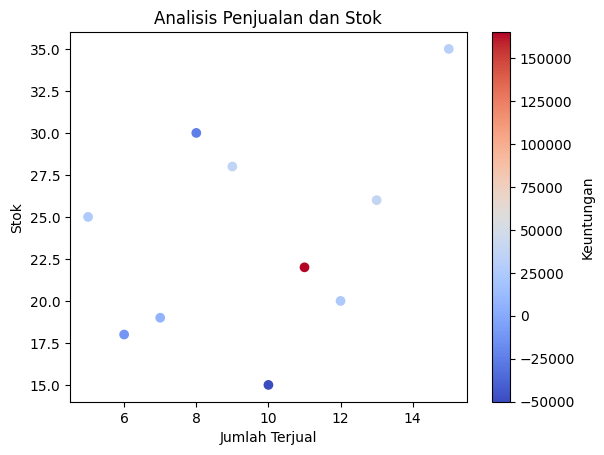

In [11]:
import matplotlib.pyplot as plt
plt.scatter (df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar (label="Keuntungan")
plt.show()